Nesta aula, vamos aprender como trabalhar com ngramas e stopwords, utilizando a bilioteca NLTK.

# NGRAMAS, Stopwords e NLTK
### Autor: Lucas Ferro Antunes de Oliveira
#### HAILab - PPGTS - PUCPR

lucas.ferro.2000@hotmail.com

#Tokenização e normalização do corpus

In [1]:
# prompt: converta um arquivo pdf em txt padrão utf-8
import sys
!{sys.executable} -m pip install PyPDF2

# !apt install python3-PyPDF2

import PyPDF2
import re

def convert_pdf_to_txt(pdf_path, txt_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = ''
            for page in pdf_reader.pages:
                text += page.extract_text()

            # Remove extra whitespace and newlines
            text = re.sub(r'\s+', ' ', text)

            with open(txt_path, 'w', encoding='utf-8') as txt_file:
                txt_file.write(text)

        print(f"PDF '{pdf_path}' converted to '{txt_path}' successfully.")
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


# Example usage:
pdf_file_path = '/content/sample_data/ your_pdf_file.pdf'  # Replace with your PDF file path
txt_file_path = 'output.txt'      # Replace with desired output file path

convert_pdf_to_txt(pdf_file_path, txt_file_path)


Error: File '/content/sample_data/ your_pdf_file.pdf' not found.


In [2]:
import nltk

In [3]:
# Instalação do NLTK
# !pip install nltk==3.6.2

In [4]:
# Importação de bibliotecas
!pip install wordcloud
!pip install PIL

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from datetime import datetime
from collections import Counter
from nltk import ngrams
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import re
nltk.download('punkt', force=True)
nltk.download('punkt_tab', force=True)

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


[nltk_data] Downloading package punkt to /home/lobato/nltk_data...


[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package punkt_tab to /home/lobato/nltk_data...


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
# Transforma .pdf em .txt
file = "bibliaEstudoARA"
caps = 1
PATH = "content/"
reader = PyPDF2.PdfReader(""+PATH+""+file+".pdf")
qt = 0
last = 0

with open(PATH+file+"_txt_cap1.txt",'w',encoding="utf-8") as txt_file:
    for page_num in range(len(reader.pages)):
        page = reader.pages[page_num]
        text = page.extract_text()
        # verifica passagem de capítulo
        block = ["1","1","1","1"]
        result = ""
        ardb = open(PATH+"ardb.txt","a",encoding="utf-8")
        # ardb.write(text) # +"\n\n\n\n\n ------------------------------------------------------------------------ \n\n\n\n\n"
        for char in text:
            block[0] = block[1]
            block[1] = block[2]
            block[2] = block[3]
            block[3] = char
            # qt+=1
            # if (qt >= 14491) :
            # ardb.write(f"{block}\n")
            for num in range(1,11):
                if ((block[1] == f"{num}" and block[2] == "." and block[3] == "\n") or (block[1] == "1" and block[2] == "0" and block[3] == "." and num==10)):
                    if last>num:
                        break
                        pass
                    print(f"cap {num}: {block} : {last}")
                    last = num
                    # txt_file = open(PATH+f"{file}_txt_cap{num}.txt","w",encoding="utf-8")
        txt_file.write(text)
#

cap 10: [' ', '1', '0', '.'] : 0
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['—', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: ['—', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['—', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['(', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10


cap 10: ['—', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['—', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [',', '1', '0', '.'] : 10
cap 10: [',', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.',

cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10

cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', 

cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', 

cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [',', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10


cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['(', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [',', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', 

cap 10: [',', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [',', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', 

cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: ['.', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['-', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['—', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['—', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['s', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['s', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['s', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['e', '1', '0', '.'] : 10
cap 10: ['2', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['”', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['8', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['4', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['é', '1', '0', '.'] : 10
cap 10: ['o', '1', '0', '.'] : 10
cap 10: ['a', '1', '0', '.'] : 10
cap 10: ['6', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['o', '1', '0', '.'] : 10
cap 10: ['2', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 

cap 10: ['0', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: [' ', '1', '0', '.'] : 10
cap 10: ['9', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['4', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10
cap 10: ['1', '1', '0', '.'] : 10
cap 10: ['\n', '1', '0', '.'] : 10


cap 10: ['\n', '1', '0', '.'] : 10


In [6]:
# Pega todas as pontuações
remove_pt = string.punctuation
remove_pt

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
# Baixa as stopwords para o português no NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_pt = set(stopwords.words('portuguese'))
len(stop_words_pt)
stop_words_pt

[nltk_data] Downloading package stopwords to /home/lobato/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [8]:
stop_words_pt.add('ser')
stop_words_pt.add('entao')
stop_words_pt.add('de')

stop_words_pt

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',

In [9]:
stop_words_pt.add('ainda')
stop_words_pt.add('porém')
stop_words_pt

{'a',
 'ainda',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entao',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 '

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

Capítulo 1:


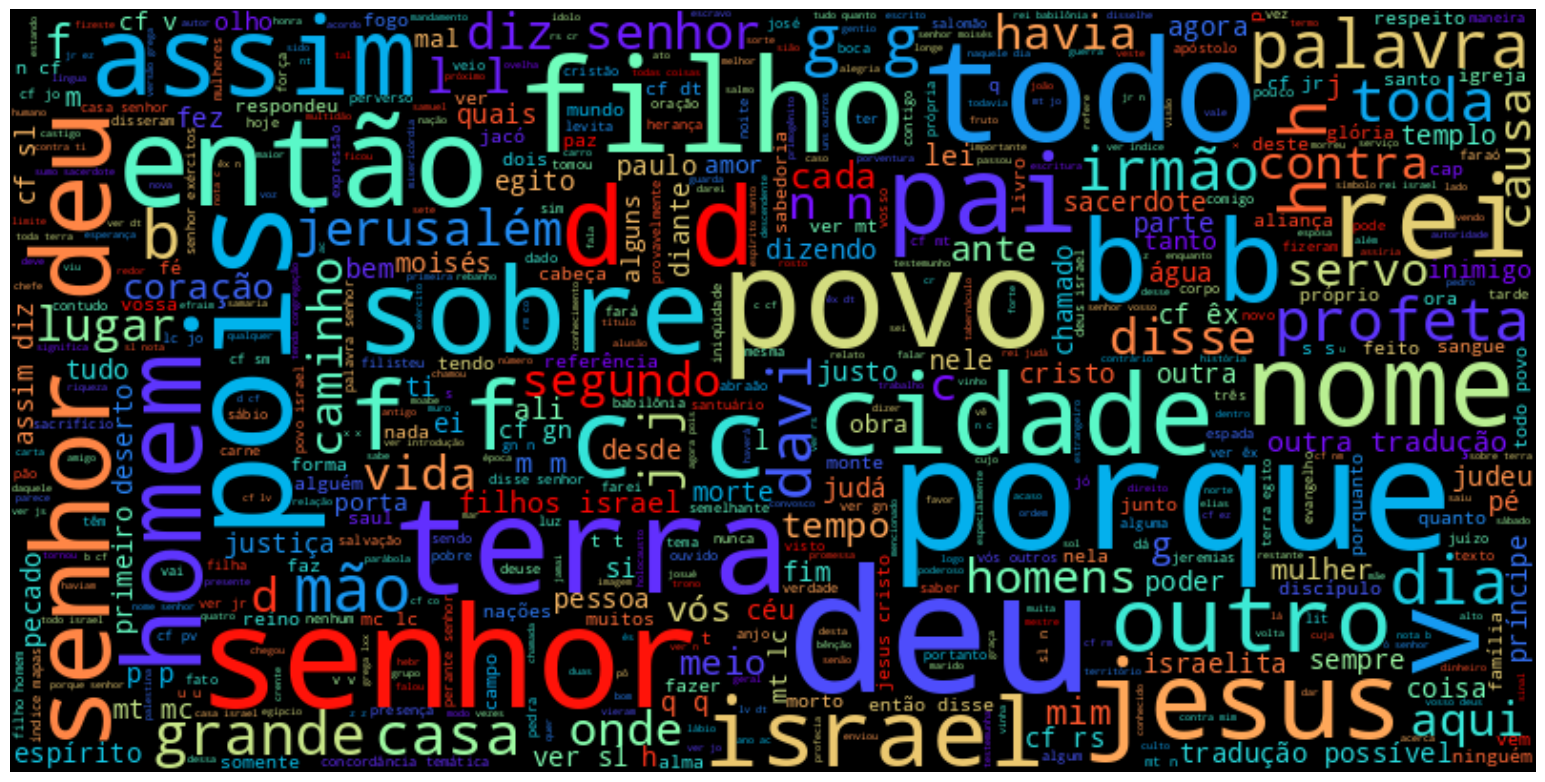

In [11]:
PATH = 'content/'
for num in range(1,caps+1):
    print(f"Capítulo {num}:")
    with open(PATH + f'{file}_txt_cap{num}.txt', 'r', encoding='utf8') as f:
        filecontent = f.read()

    # print(filecontent[0:])
    type(filecontent)
    len(filecontent) # número de tokens
    ## Transformando o texto completo em sentenças (tokenizer do NLTK)
    sentencas = []  
    for sentence in sent_tokenize(filecontent, language='english'):
        sentencas.append(sentence)
    # sentencas
    index = 1
    # for sentenca in sentencas[0:100]: # mostrando as 100 primeiras
        # print(f'{index}: {sentenca}')
        # index+=1
    ## Segmentação por quebra de linha e depois pelo tokenizer do NLTK
    sentencas_linha = []
    for sentence in filecontent.split('\n'):
        if sentence != '':
            for processed_sentence in sent_tokenize(sentence, language = 'portuguese'):
                sentencas_linha.append(processed_sentence)
    index = 1
    # for sentenca in sentencas_linha[0:100]: # mostrando as 100 primeiras
        # print(f'{index}: {sentenca}')
        # index+=1
    ## Tokenização de cada sentença em palavras (tokenizer do NLTK)




    sentencas_tokenizadas = []

    for sentenca in sentencas_linha:
        tokenized_sentence = word_tokenize(sentenca, language='portuguese')
        sentencas_tokenizadas.append(tokenized_sentence)
    index = 1
    # for tokens in sentencas_tokenizadas[0:100]: # mostrando as 100 primeiras
        # print(f'{index}: {tokens}')
        # index+=1
    ## Pre-processamento dos elementos tokenizados
    # A ideia aqui é retirar todas as palavras que pertencem a lista de stopwords, deixar tudo em minúsculos, retirar espaços e quebras de linhas adicionais desnecessários.
    from typing import TextIO
    sent_tokenizada_preprocessed = []
    for sent_tokenizada in sentencas_tokenizadas:
        raw = [token.lower() for token in sent_tokenizada]

        raw = [''.join(c for c in s if c not in remove_pt+'–'+'🙁'+'\’'+'\”'+"“") for s in raw]
        raw = [re.sub(r"\d+[.,]?\d*","", s) for s in raw]
        raw = [s for s in raw if s not in stop_words_pt] # stopwords
        raw = [' '.join(s.split()) for s in raw if s]
        string = ' '.join(raw).rstrip().lstrip()
        if string != '':
            sent_tokenizada_preprocessed.append(string)

    index = 1
    # for texto in sent_tokenizada_preprocessed[0:100]: # mostrando as 100 primeiras
        # print(f'{index}: {texto}')
        # index+=1

    #NGramas
    len(sent_tokenizada_preprocessed)
    import os
    ngram_value = 1
    most_common_value = 100

    ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
    flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
    ngram_list = Counter(flat_ngram_counts)

    common = ngram_list.most_common(most_common_value)

    df_common = pd.DataFrame(common, columns = ['Ngram','Count'])
    # index = 1
    # for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    #     print(f'{index}: {n_gram}')
    #     index+=1
    # index = 1
    # for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    #     print(f'{index}: {n_gram}')
    #     index+=1
    len(ngram_list)
    # common
    df_common.head(30)
    # Quantidade de palavras
    len(flat_ngram_counts)
    # Quantidade de palavras únicas
    len(ngram_list)
    color = 'black'
    height = 400
    width = 800
    max_words = 2000
    colormap = 'rainbow'
    size_X = 50
    size_Y = 50

    str_text=" ".join(sent_tokenizada_preprocessed)


    wordcloud = WordCloud(background_color = color, max_words = max_words, max_font_size = 90, colormap = colormap, height = height, width = width).generate(str_text)

    X = size_X/2.54
    Y = size_Y/2.25

    fig = plt.figure(figsize = [X, Y])
    plt.imshow(wordcloud, interpolation = "bilinear")
    plt.axis("off")
    plt.box(False)
    plt.show()

fazer a frequencia, Carlos